In [75]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='nitsurat',
    database='ecommerce'
)

cur = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/ritiksharma_2005/CODE 🧑‍💻/sql/e-commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cur.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cur.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 

db=mysql.connector.connect(host="localhost",
                           username ="root",
                           password ="nitsurat",
                           database ="ecommerce" )

cur =db.cursor()


# 1.List all unique cities where customers are located.

In [77]:
query =""" select distinct customer_city from customers """
cur.execute(query)
data = cur.fetchall()
data 

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2.Count the number of orders placed in 2017.

In [12]:
query =""" select count(order_id) from orders where year (order_purchase_timestamp) =2017 """
cur.execute(query)
data = cur.fetchall()

"Total order that placed in 2017 are ", data[0][0]


('Total order that placed in 2017 are ', 45101)

# 3. Find the total sales per category.

In [78]:
query ="""
SELECT products.product_category as category,round(sum(payments.payment_value),2) as total_sales
FROM ecommerce.products 
join ecommerce.order_items 
on ecommerce.products.product_id =ecommerce.order_items.product_id
join ecommerce.payments 
on ecommerce.payments.order_id = ecommerce.order_items.order_id
group by  ecommerce.products.product_category
 """
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,perfumery,4.053909e+07
1,Furniture Decoration,1.144141e+08
2,telephony,3.895056e+07
3,bed table bath,1.370043e+08
4,automotive,6.818355e+07
...,...,...
69,cds music dvds,9.595440e+04
70,La Cuisine,2.330824e+05
71,Fashion Children's Clothing,6.285360e+04
72,PC Gamer,1.739544e+05


# 4. Calculate the percentage of orders that were paid in installments.

In [79]:
query =""" #4. Calculate the percentage of orders that were paid in installments.
SELECT 
    (SUM(CASE
                WHEN payments.payment_installments > 1 THEN 1
                ELSE 0
            END) * 100 / COUNT(*))  
FROM
    ecommerce.payments """
cur.execute(query)
data = cur.fetchall()

"installment_percentage is ", data[0][0]

('installment_percentage is ', Decimal('49.4176'))

# Count the number of customers from each state. 

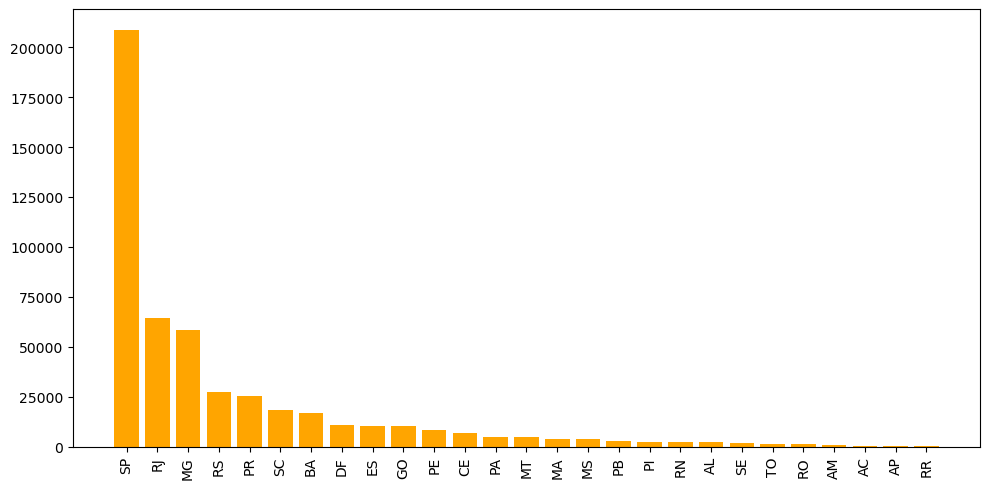

In [80]:
query ="""
select ecommerce.customers.customer_state, count( ecommerce.customers.customer_state)
from ecommerce.customers
group by ecommerce.customers.customer_state
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["state", "total_customers"])
df = df.sort_values(by="total_customers", ascending=False)
plt.figure(figsize=(10,5))
plt.bar(df["state"], df["total_customers"],color="orange")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate the number of orders per month in 2018.


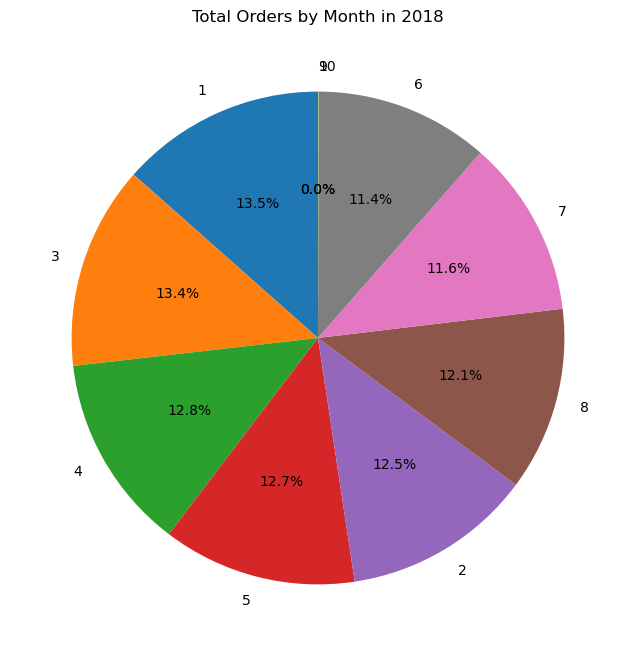

In [81]:
query ="""
SELECT 
    MONTH(ecommerce.orders.order_purchase_timestamp) AS months,
    COUNT(ecommerce.orders.order_id) AS total_orders
FROM
    ecommerce.orders
WHERE
    YEAR(ecommerce.orders.order_purchase_timestamp) = 2018
GROUP BY months
ORDER BY total_orders
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months", "total_orders"])
df = df.sort_values(by="total_orders", ascending=False)
# -------- pie chart --------
plt.figure(figsize=(8,8))
plt.pie(df["total_orders"], labels=df["Months"], autopct="%1.1f%%", startangle=90)

plt.title("Total Orders by Month in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

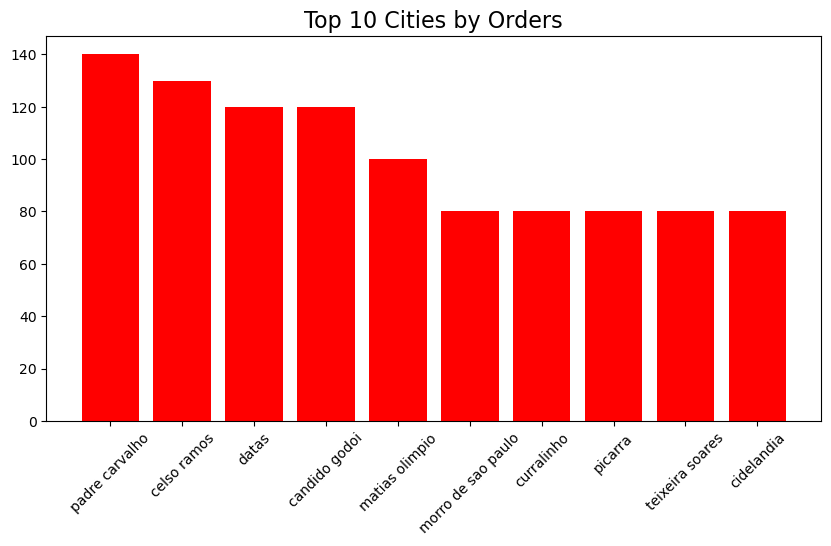

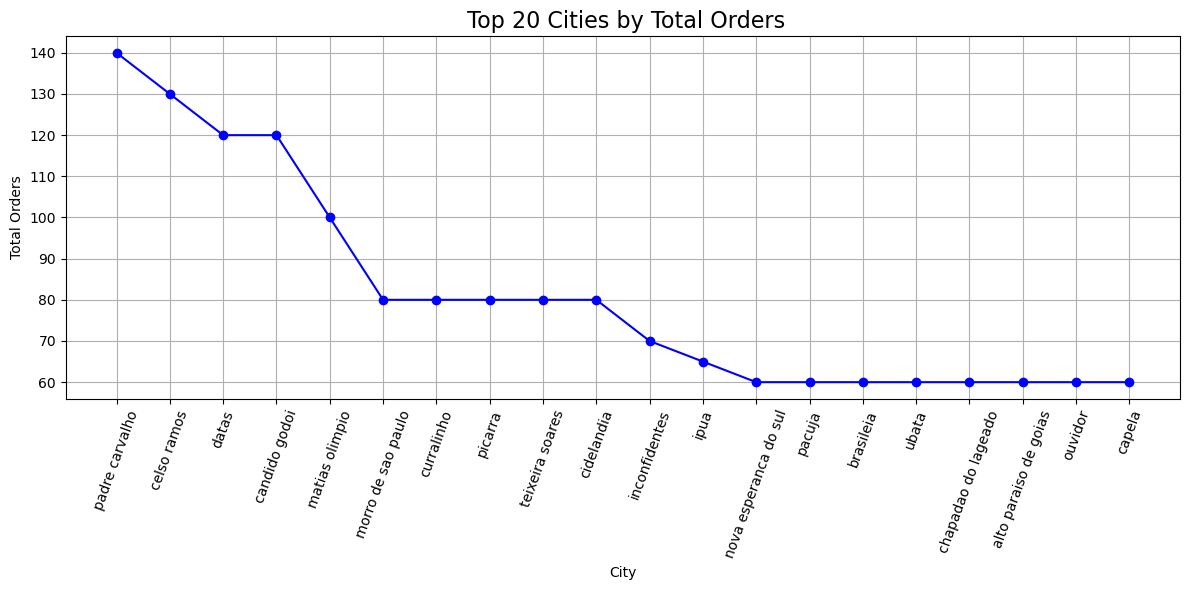

In [82]:
query ="""
select ecommerce.customers.customer_city as city, avg(new_table.c) as average_order from ecommerce.customers
join 
( select ecommerce.orders.order_id,ecommerce.orders.customer_id, count(ecommerce.order_items.order_id) as c
from ecommerce.orders join ecommerce.order_items on
ecommerce.orders.order_id=ecommerce.order_items.order_id
group by ecommerce.orders.order_id,ecommerce.orders.customer_id) as new_table
on
ecommerce.customers.customer_id=new_table.customer_id
group by city
order by average_order
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months", "total_orders"])
df = df.sort_values(by="total_orders", ascending=False)

#------ bar chart --------

top10 = df.head(10)
plt.figure(figsize=(10,5))
plt.bar(top10["Months"], top10["total_orders"], color="red")
plt.title("Top 10 Cities by Orders", fontsize=16)
plt.xticks(rotation=45)
plt.show()


#------ line chart --------

plt.figure(figsize=(12,6))
top20 = df.head(20)
plt.plot(top20["Months"], top20["total_orders"], 
         marker="o", linestyle="-", color="blue")

plt.title(" Top 20 Cities by Total Orders", fontsize=16)
plt.xlabel("City")
plt.ylabel("Total Orders")

plt.xticks(rotation=70)  # rotate city names
plt.grid(True)           # add line grid for readability

plt.tight_layout()
plt.show()


# Calculate the percentage of total revenue contributed by each product category.

In [83]:
query ="""
SELECT 
    R_table.category,
    ROUND((R_table.Revenue * 100 / (SELECT 
                    SUM(ecommerce.payments.payment_value)
                FROM
                    ecommerce.payments)),
            2) AS Percent_Revenue
FROM
    (SELECT 
        ecommerce.products.product_category AS category,
            SUM(ecommerce.payments.payment_value) AS Revenue
    FROM
        ecommerce.products
    JOIN ecommerce.order_items ON ecommerce.products.product_id = ecommerce.order_items.product_id
    JOIN ecommerce.payments ON ecommerce.payments.order_id = ecommerce.order_items.order_id
    GROUP BY category) AS R_table
GROUP BY R_table.category
ORDER BY Percent_Revenue DESC
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Months", "total_orders"])
df = df.sort_values(by="total_orders", ascending=False)

top20=df.head(20)
top20


,Months,total_orders
0,bed table bath,213.95
1,HEALTH BEAUTY,207.06
2,computer accessories,198.06
3,Furniture Decoration,178.67
4,Watches present,178.55
5,sport leisure,173.92
6,housewares,136.77
7,automotive,106.48
8,Garden tools,104.73
9,Cool Stuff,97.41


# Identify the correlation between product price and the number of times a product has been purchased.

Correlation between price and sales: -0.03213985254297966


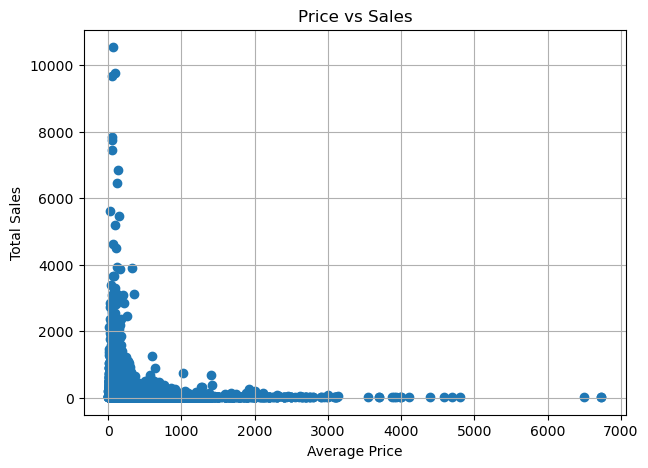

In [84]:
query ="""
SELECT 
    ecommerce.order_items.product_id AS products,
    ecommerce.products.product_category AS category,
    COUNT(ecommerce.order_items.order_id) AS sales,
    ROUND(AVG(ecommerce.order_items.price), 2) AS price
FROM
    ecommerce.order_items
        JOIN
    ecommerce.products ON ecommerce.order_items.product_id = ecommerce.products.product_id
GROUP BY  ecommerce.order_items.product_id,category
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["products", "category","sales","price"])
df = df.sort_values(by="price", ascending=False)

# ----------------------------------------------

correlation = df["price"].corr(df["sales"])
print("Correlation between price and sales:", correlation)

df.groupby("category")[["price", "sales"]].corr()

# ----------------------------------------------

plt.figure(figsize=(7,5))
plt.scatter(df["price"], df["sales"])

plt.title("Price vs Sales")
plt.xlabel("Average Price")
plt.ylabel("Total Sales")

plt.grid(True)
plt.show()


# Calculate the total revenue generated by each seller, and rank them by revenue.

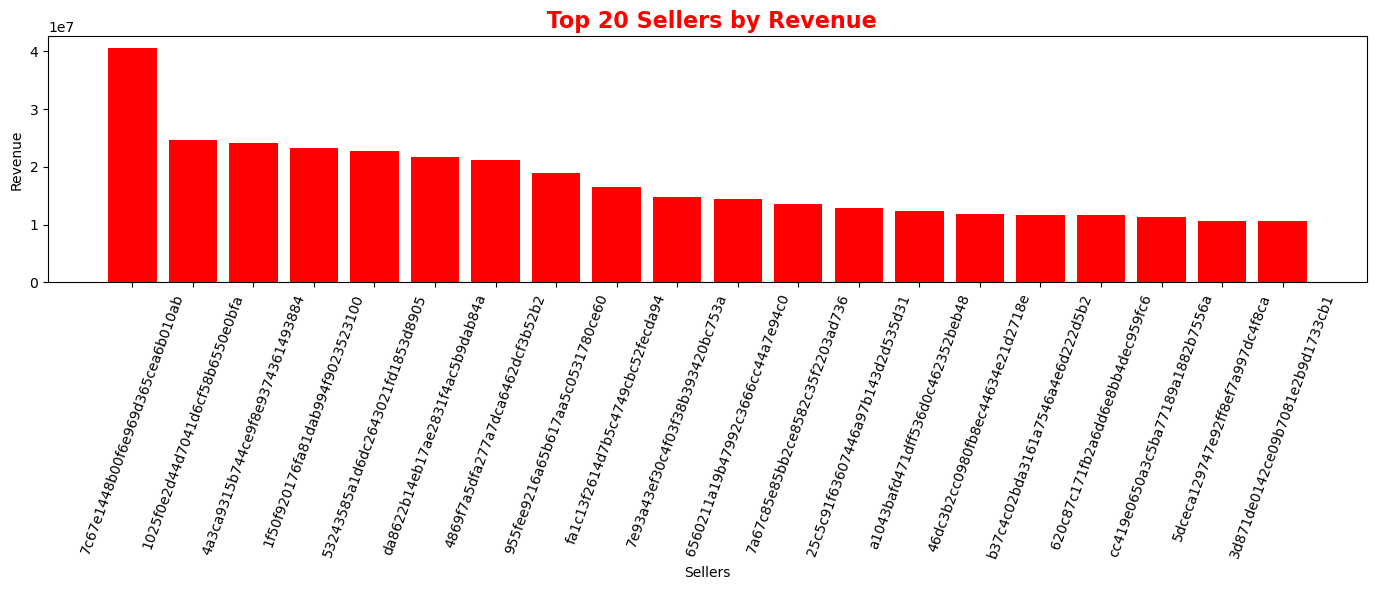

In [85]:
query = """
# Calculate the total revenue generated by each seller, and rank them by revenue.
SELECT 
    ecommerce.sellers.seller_id AS Sellers,
    ROUND(SUM(ecommerce.payments.payment_value), 2) AS Revenue
FROM
    ecommerce.sellers
        JOIN
    ecommerce.order_items ON ecommerce.sellers.seller_id = ecommerce.order_items.seller_id
        JOIN
    ecommerce.payments ON ecommerce.order_items.order_id = ecommerce.payments.order_id
GROUP BY sellers
ORDER BY revenue
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Sellers", "Revenue"])
df = df.sort_values(by="Revenue", ascending=False)
df


plt.figure(figsize=(14,6))
top20 = df.head(20)
plt.bar(top20["Sellers"], top20["Revenue"] ,  color="red")
        
plt.title(" Top 20 Sellers by Revenue", fontsize=16, color="red",fontweight="bold")
plt.xlabel("Sellers")
plt.ylabel("Revenue")

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [86]:
query = """  
SELECT 
    ecommerce.orders.customer_id,
    ecommerce.orders.order_purchase_timestamp,
    avg(order_value) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row ) as mov_avg from
( SELECT 
    ecommerce.orders.customer_id,
    ecommerce.orders.order_purchase_timestamp,
    round(SUM(ecommerce.order_items.price),2) AS order_value
FROM
    ecommerce.orders
        JOIN
    ecommerce.order_items ON ecommerce.orders.order_id = ecommerce.order_items.order_id
GROUP BY  ecommerce.orders.customer_id , ecommerce.orders.order_purchase_timestamp) as a
join 
 ecommerce.orders on 
  ecommerce.orders.customer_id = a.customer_id
  """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Customer_id", "order_purchase_timestamp","mov_avg"])
df = df.sort_values(by="mov_avg", ascending=False)
df

,Customer_id,order_purchase_timestamp,mov_avg
42377,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,268800.0
42376,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,268800.0
42379,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,268800.0
42375,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,268800.0
42378,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,268800.0
...,...,...,...
307864,9f9d249355f63c5c1216a82b802452c1,2018-04-24 20:15:21,17.0
307863,9f9d249355f63c5c1216a82b802452c1,2018-04-24 20:15:21,17.0
307862,9f9d249355f63c5c1216a82b802452c1,2018-04-24 20:15:21,17.0
307861,9f9d249355f63c5c1216a82b802452c1,2018-04-24 20:15:21,17.0


# Calculate the cumulative sales per month for each year.

In [95]:
query="""
select years,months,
sum(order_value) over(partition by years,months ) as cumulative_sales from
(select year(ecommerce.orders.order_purchase_timestamp) as years ,month(ecommerce.orders.order_purchase_timestamp) as months,
round(sum(ecommerce.payments.payment_value),2) as order_value from ecommerce.orders join
ecommerce.payments on ecommerce.orders.order_id= ecommerce.payments.order_id
group by years,months ) as cumulative_table
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "months","cumulative_sales"])
df = df.sort_values(by="cumulative_sales", ascending=False)
df

,years,months,cumulative_sales
13,2017,11,23897655.99
18,2018,4,23215709.61
17,2018,3,23193042.39
19,2018,5,23079643.02
15,2018,1,22300083.58
21,2018,7,21330814.98
20,2018,6,20477610.01
22,2018,8,20448506.43
16,2018,2,19849266.80
14,2017,12,17568029.60


# Calculate the year-over-year growth rate of total sales.

In [96]:
querry = """
select years,revenue, 
round((revenue  - lag(revenue,1) over(order by years ))*100/ lag(revenue,1) over(order by years ),2) as Growth_Rate from 
(select year(ecommerce.orders.order_purchase_timestamp) as years , round(sum(ecommerce.payments.payment_value ),2) as revenue from
ecommerce.orders join ecommerce.payments on
ecommerce.orders.order_id = ecommerce.payments.order_id 
group by years) as ab
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "revenue","Growth_Rate"])
df = df.sort_values(by="Growth_Rate", ascending=False)
df

,years,revenue,Growth_Rate
13,2017,11,23897655.99
18,2018,4,23215709.61
17,2018,3,23193042.39
19,2018,5,23079643.02
15,2018,1,22300083.58
21,2018,7,21330814.98
20,2018,6,20477610.01
22,2018,8,20448506.43
16,2018,2,19849266.80
14,2017,12,17568029.60


# # Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [92]:
query = """
SELECT
    ROUND(
        COUNT(DISTINCT retained.customer_id) * 100.0 /
        (SELECT COUNT(DISTINCT customer_id) FROM ecommerce.orders),
        2
    ) AS retention_rate_percentage
FROM (
    SELECT DISTINCT
        first_orders.customer_id
    FROM (
        SELECT
            ecommerce.orders.customer_id,
            MIN(ecommerce.orders.order_purchase_timestamp) AS first_purchase_date
        FROM ecommerce.orders
        GROUP BY ecommerce.orders.customer_id
    ) first_orders
    JOIN ecommerce.orders
        ON ecommerce.orders.customer_id = first_orders.customer_id
    WHERE ecommerce.orders.order_purchase_timestamp > first_orders.first_purchase_date
      AND ecommerce.orders.order_purchase_timestamp <= 
          DATE_ADD(first_orders.first_purchase_date, INTERVAL 6 MONTH)
) retained;

"""

cur.execute(query)
data = cur.fetchall()
data

[(Decimal('0.00'),)]

# END 